# Основные методы поиска оценок. Задача 1

__Ильичёв А.С., 693__

In [1]:
import numpy as np
import scipy.stats as sts
from matplotlib import pyplot as plt
%matplotlib inline

#### 1. В этой задаче нужно оценить дисперсию оценки для разных  распределений методом бутстрепа. Сначала зададим число элементов N в исходной выборке и напишем необходимые функции.

In [2]:
N = 1000
ns = np.arange(1, N + 1)

Функция, вычисляющая оценку по методу моментов для каждого $n \le N$.

In [3]:
def calculate_estimator(sample, first_func, second_func=None):
    est = np.array([first_func(sample[:i]) for i in ns])
    if second_func:
        est2 = np.array([second_func(sample[:i]) for i in ns])
        ests = [est, est2]
    else:
        ests = [est]
    return ests

Функция, осуществляющая построение графиков.

In [4]:
def make_plot(var_par, var_nonpar):
    plt.figure(figsize=(10, 5))
    plt.plot(var_par[0], var_par[1][0], c='blue', 
             label = '1, парам. бутстреп', alpha=0.7)
    plt.plot(var_nonpar[0], var_nonpar[1][0], c='green', 
             label = '1, непарам. бутстреп', alpha=0.7)
    plt.title(r'Зависимость бутстрепной оценки дисперсии '
              r'оценки $\theta_1$ от $n$')
    plt.legend(title='Номер параметра')
    plt.show()
    if var_par[1][1][0]: # первый элемент массива не None
        plt.figure(figsize=(10, 5))
        plt.plot(var_par[0], var_par[1][1], c='orange',
                 label = '2, парам. бутстреп')
        plt.plot(var_nonpar[0], var_nonpar[1][1], c='red',
                 label = '2, непарам. бутстреп', alpha=0.7)
        plt.title(r'Зависимость бутстрепной оценки дисперсии '
                  r'оценки $\theta_2$ от $n$')
        plt.legend(title='Номер параметра')
        plt.show()


Главная функция подсчета бутстрепных оценок (реализация метода, описанного во введении к заданию). Для увеличения быстродействия оценка производится по сетке (с шагом, задаваемым параметром `grid_step`). Для n < 100 считать не будем, т.к. там оценка дисперсии велика и масштаб графиков увеличивается.

In [5]:
# число бутстрепных выборок
straps_num = N
# номер n, с которого начинается подсчет
start_from = 100
def bootstrap(parametric, distr, distr_sample, ests, grid_step, 
              parametric_distr, first_func, second_func=None):
    ns_strap = np.arange(max(start_from, grid_step), N + 1, grid_step)
    var_strap1 = [None] * len(ns_strap)
    var_strap2 = [None] * len(ns_strap)
    for i, n in enumerate(ns_strap):
        # генерируем N бутстрепных выборок размера n
        if not parametric:
            samples = np.random.choice(distr_sample[:n], size=(straps_num, n))
        else:                 
            if second_func: # если функция задана, то распределение 
                            # двухпараметрическое
                samples = parametric_distr(ests[0][n - 1], 
                               ests[1][n - 1]).rvs(size=(N, n))
            else: # однопараметрическое распределение
                samples = parametric_distr(ests[0][n - 1]).rvs(size=(straps_num, n))
        if second_func:
                # считаем оценку второго параметра и ее дисперсию для бутстрепной
                # выборки
                ests_strap2 = np.array([second_func(sample) for sample in samples])
                var_strap2[i] = np.mean(ests_strap2**2) - (np.mean(ests_strap2))**2
        # считаем оценку первого параметра и ее дисперсию для бутстрепной выборки
        ests_strap1 = np.array([first_func(sample) for sample in samples])
        var_strap1[i] = np.mean(ests_strap1**2) - (np.mean(ests_strap1))**2
    return [ns_strap, (var_strap1, var_strap2)]

Обертка, проводящая бутстрепную оценку и строящая графики.

In [6]:
def make_bootstrap(general_distr, sample, ests, grid_step, first_func, 
                   second_func=None, parametric_distr=None):
    if not parametric_distr:
        parametric_distr = general_distr
    var_par = bootstrap(parametric=True, distr=general_distr, 
                        distr_sample=sample, ests=ests, grid_step=grid_step,
                        first_func=first_func, second_func=second_func, 
                        parametric_distr=parametric_distr)
    var_nonpar = bootstrap(parametric=False, distr=general_distr, 
                        distr_sample=sample, ests=ests, grid_step=grid_step,
                        first_func=first_func, second_func=second_func, 
                        parametric_distr=None)
    make_plot(var_par, var_nonpar)

#### 2. Проведем бутстрепную оценку для всех распределений из задачи.


### а) $\mathcal{N}(a, \sigma^2)$.

$a^* = \overline X$, $\left(\sigma^2\right)^* = \overline{X^2} - \left(\overline X\right)^2$


theta =  (0, 1)


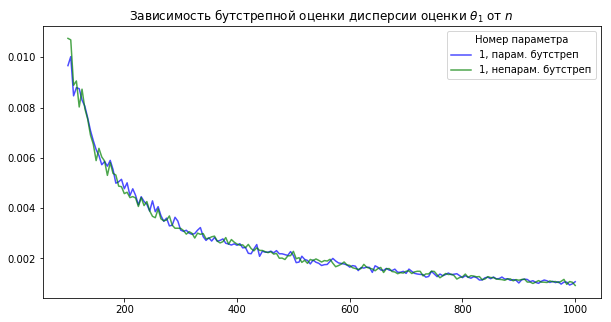

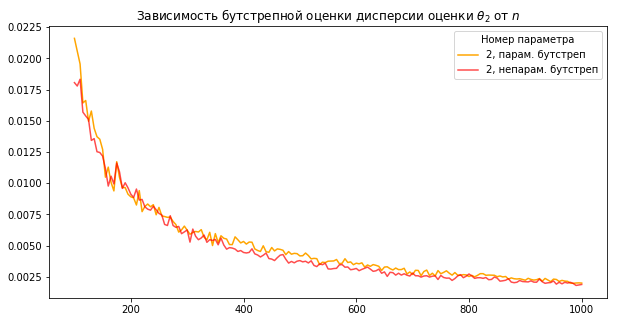

theta =  (5, 5)


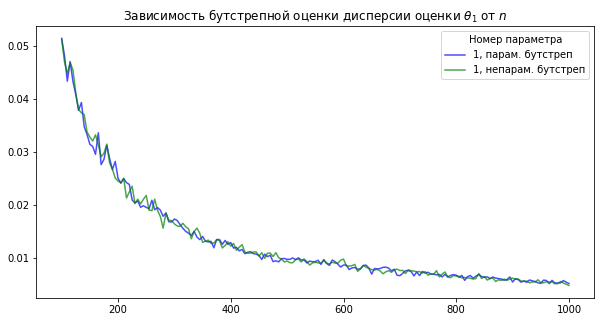

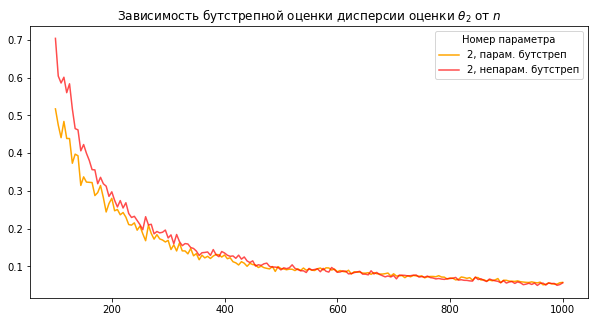

theta =  (5, 10)


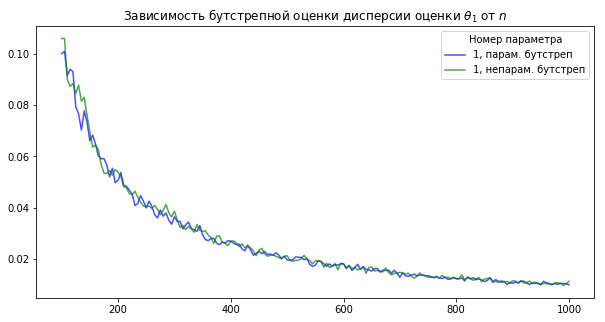

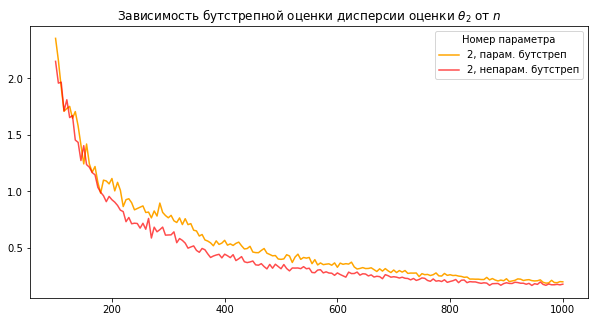

theta =  (10, 10)


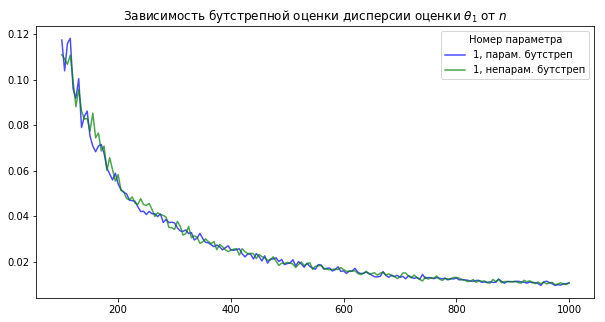

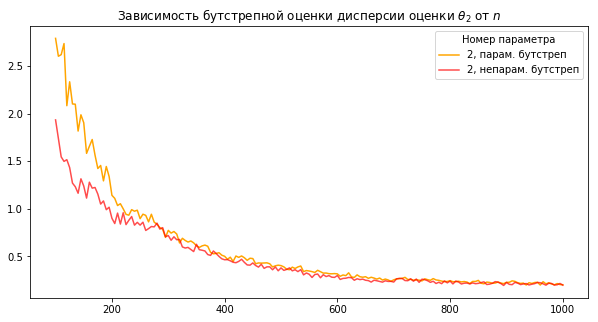

In [7]:
norm_distr = sts.norm
a_func = lambda x: np.mean(x)
sigma_func = lambda x: np.mean(x**2) - (np.mean(x))**2 
params = [(0,1), (5, 5), (5, 10), (10, 10)]
def parametric_distr(param1, param2):
    # функция принимает корень из дисперсии
    return norm_distr(param1, np.sqrt(param2))

for param in params:
    distr = parametric_distr(param[0], param[1])
    sample = distr.rvs(size=N)
    ests = calculate_estimator(sample, a_func, sigma_func)
    print('theta = ', param)
    make_bootstrap(norm_distr, sample, ests, 5, a_func, 
                   sigma_func, parametric_distr)

### б) $\Gamma(\alpha, \lambda)$.

$$p(x) = \frac{x^{\alpha - 1}\lambda^\alpha}{\Gamma(\alpha)} e^{-\lambda x} I(x > 0) \nonumber$$

$\alpha^* = \frac{\left(\overline X\right)^2}{\overline{X^2} - \left(\overline X\right)^2}$, $\lambda^* = \frac{\overline X}{\overline{X^2} - \left(\overline X\right)^2}$

theta =  (1, 1)


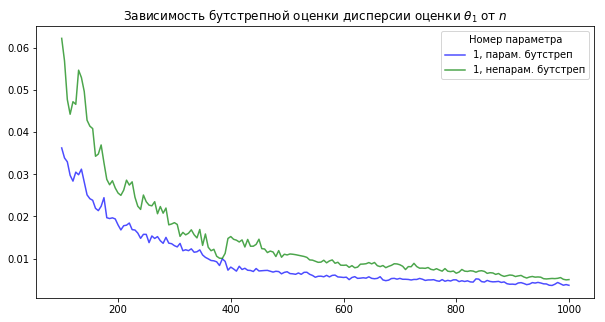

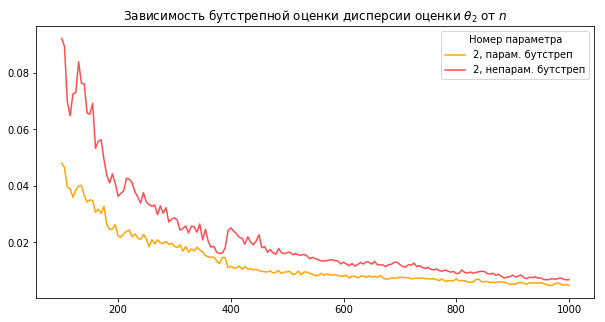

theta =  (2, 1)


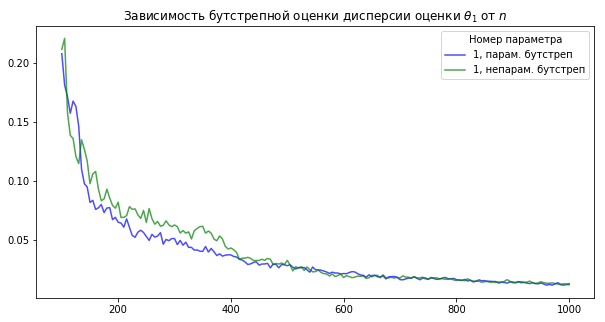

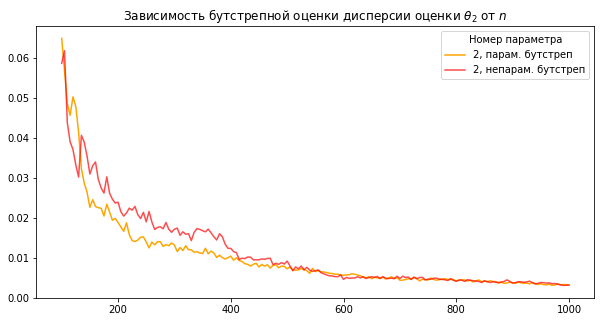

theta =  (2, 0.01)


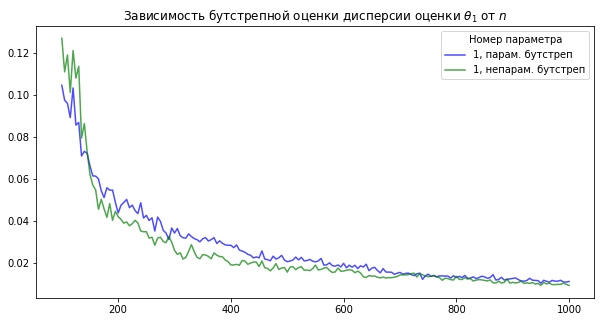

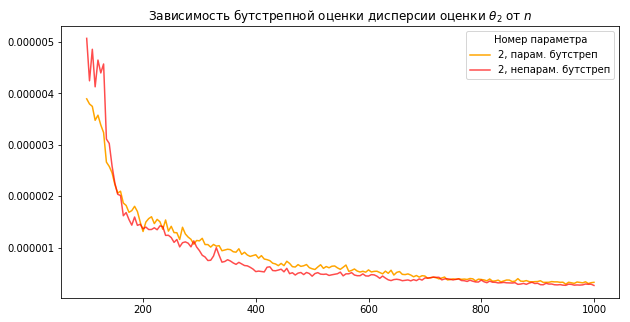

In [8]:
gamma_distr = sts.gamma
# для n = 1, например, функция оценки методом моментов вернет бесконечность
# не будем выводить предупреждения о таких случаях
np.seterr(divide='ignore')
alpha_func = lambda x: np.mean(x)**2/(np.mean(x**2) - (np.mean(x))**2)
lambda_func = lambda x: np.mean(x)/(np.mean(x**2) - (np.mean(x))**2)
params = [(1,1), (2, 1), (2, 0.01)]
def parametric_distr(param1, param2):
    # функция принимает параметр масштаба, обратный нашему
    return gamma_distr(a=param1, scale=1/param2)

for param in params:
    distr = parametric_distr(param[0], param[1])
    sample = distr.rvs(size=N)
    ests = calculate_estimator(sample, alpha_func, lambda_func)
    print('theta = ', param)
    make_bootstrap(norm_distr, sample, ests, 5, alpha_func, 
                   lambda_func, parametric_distr)

### в) $R(a, b)$

$a^* = \overline X - \sqrt{3\left(\overline{X^2} - \left(\overline X\right)^2 \right)}$, $b^* = \overline X + \sqrt{3\left(\overline{X^2} - \left(\overline X\right)^2 \right)}$

theta =  (0, 1)


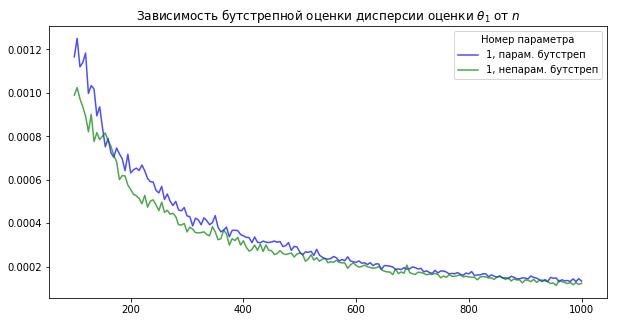

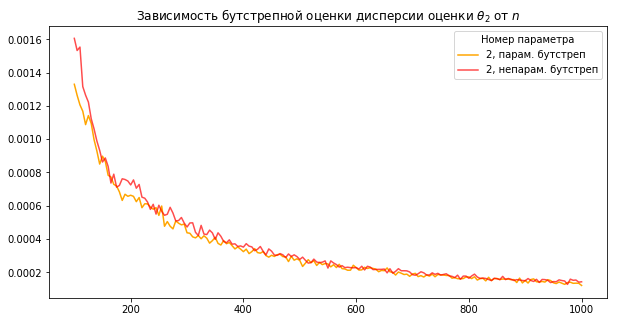

theta =  (5, 6)


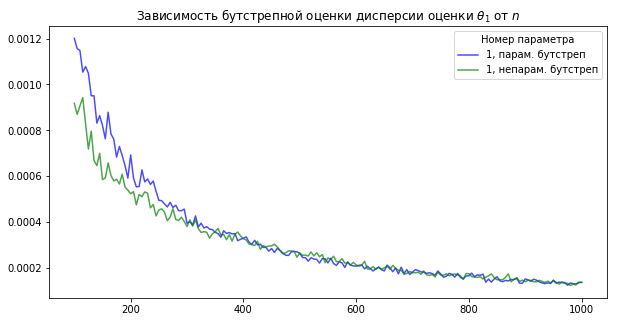

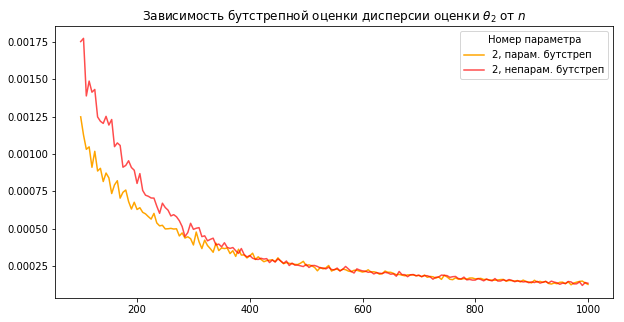

theta =  (5, 8)


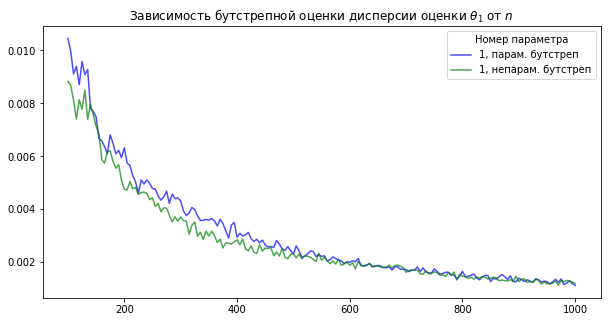

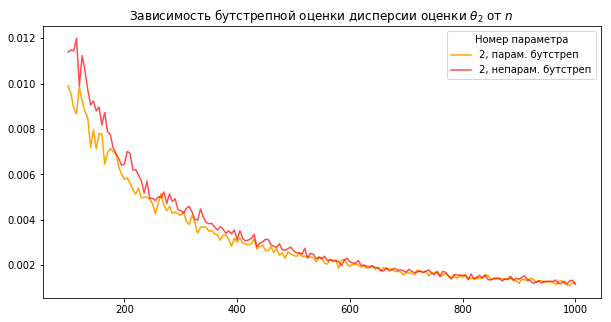

theta =  (5, 100)


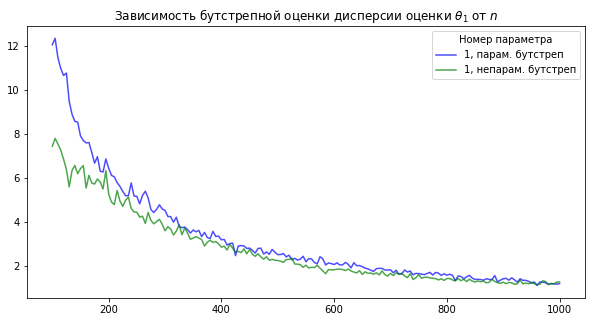

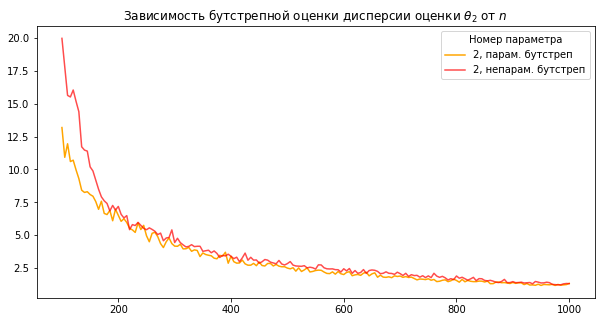

In [9]:
uniform_distr = sts.uniform
a_func = lambda x: np.mean(x) - np.sqrt(3 * (np.mean(x**2) - (np.mean(x))**2))
b_func = lambda x: np.mean(x) + np.sqrt(3 * (np.mean(x**2) - (np.mean(x))**2))
params = [(0,1), (5, 6), (5, 8), (5, 100)]
def parametric_distr(param1, param2):
    # функция возвращает распределение на [a, a+b]
    return uniform_distr(param1, param2 - param1)

for param in params:
    distr = parametric_distr(param[0], param[1])
    sample = distr.rvs(size=N)
    ests = calculate_estimator(sample, a_func, b_func)
    print('theta = ', param)
    make_bootstrap(uniform_distr, sample, ests, 5, a_func, 
                   b_func, parametric_distr)

### г) $\mathrm{Pois}(\lambda)$

$\lambda^* = \overline X$

theta =  1


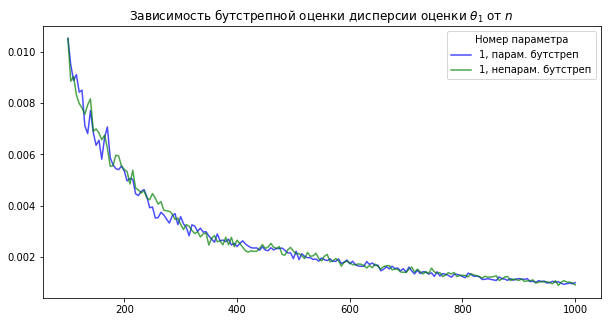


theta =  4


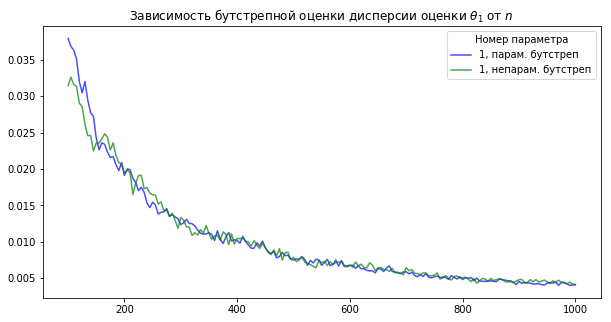


theta =  7


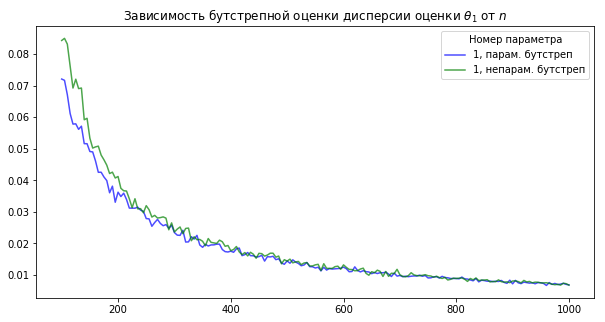


theta =  11


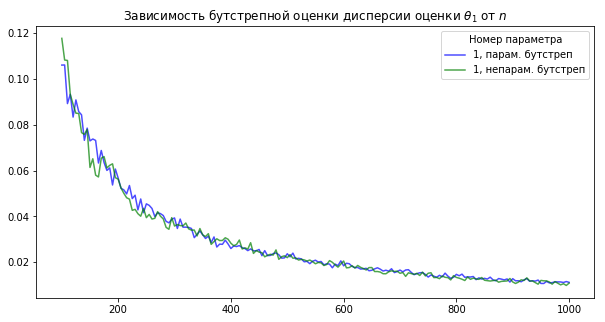

In [10]:
poisson_distr = sts.poisson
lambda_func = lambda x: np.mean(x) 
params = [1, 4, 7, 11]

for param in params:
    distr = poisson_distr(param)
    sample = distr.rvs(size=N)
    ests = calculate_estimator(sample, lambda_func)
    print('theta = ', param)
    make_bootstrap(poisson_distr, sample, ests, 5, lambda_func)

### д) $\mathrm{Bin}(m, p)$

$m^* = \frac{\left(\overline X\right)^2}{\overline X + \left(\overline X\right)^2 - \overline{X^2}}$, $p^* = \frac{\overline X + \left(\overline X\right)^2 - \overline{X^2}}{\overline X}$

theta =  (5, 0.5)


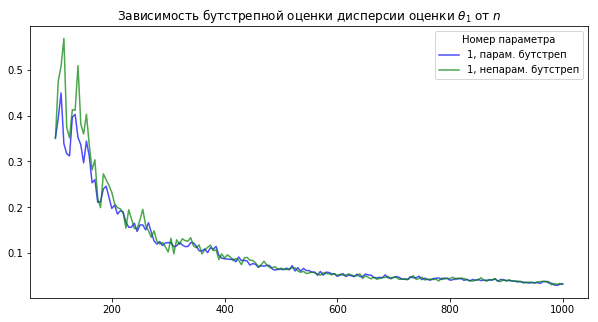

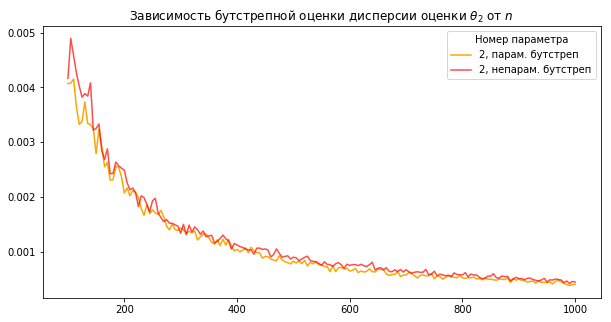

theta =  (20, 0.5)


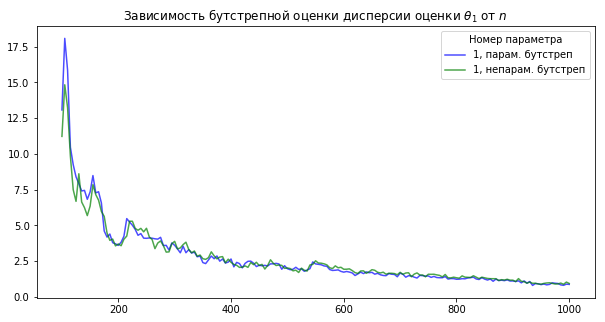

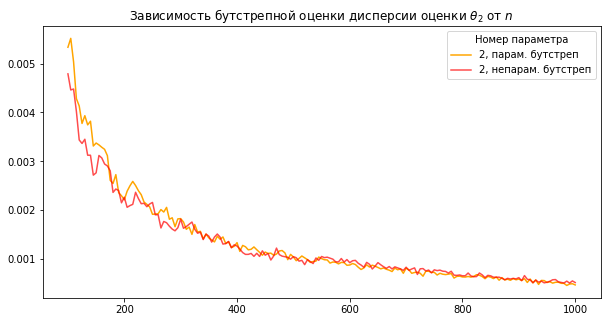

theta =  (20, 0.7)


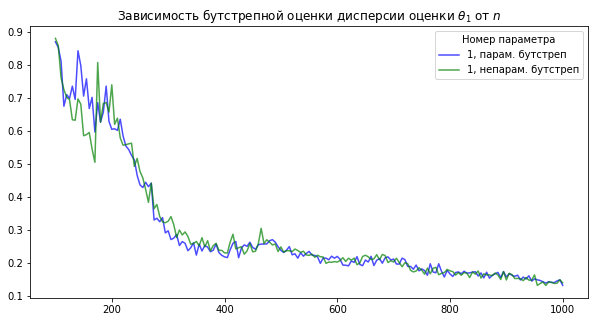

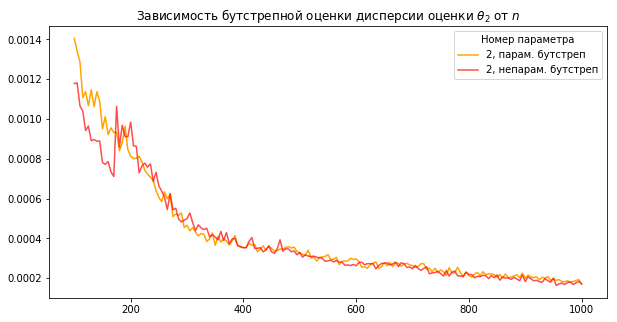

theta =  (25, 0.4)


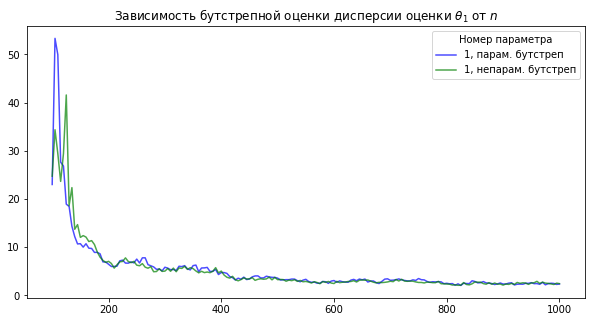

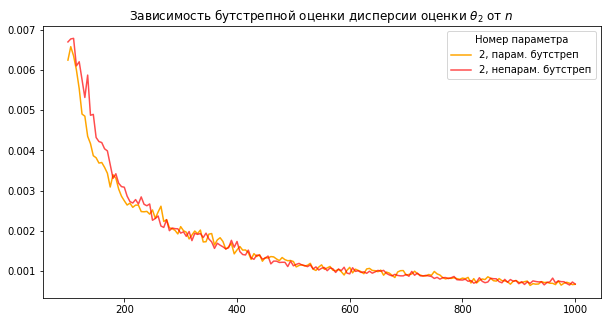

In [19]:
binom_distr = sts.binom
m_func = lambda x: np.mean(x)**2 / (np.mean(x) + np.mean(x)**2 - np.mean(x**2))
p_func = lambda x: (np.mean(x) + np.mean(x)**2 - np.mean(x**2)) / np.mean(x)
params = [(5, 0.5), (20, 0.5), (20, 0.7), (25, 0.4)]
def parametric_distr(param1, param2):
    # оценка m может получаться нецелой
    return binom_distr(int(round(param1)), param2)

for param in params:
    distr = parametric_distr(param[0], param[1])
    sample = distr.rvs(size=N)
    ests = calculate_estimator(sample, m_func, p_func)
    print('theta = ', param)
    make_bootstrap(binom_distr, sample, ests, 5, m_func, 
                   p_func, parametric_distr)

### е) $\mathrm{Geom}(p)$

$p^* = 1/\overline X$

theta =  0.2


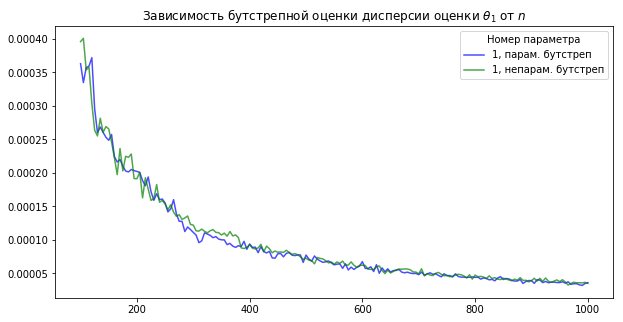


theta =  0.5


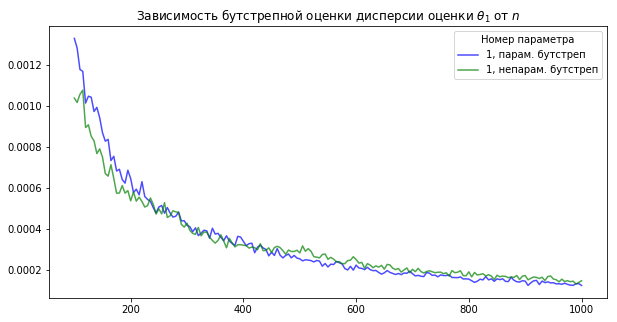


theta =  0.8


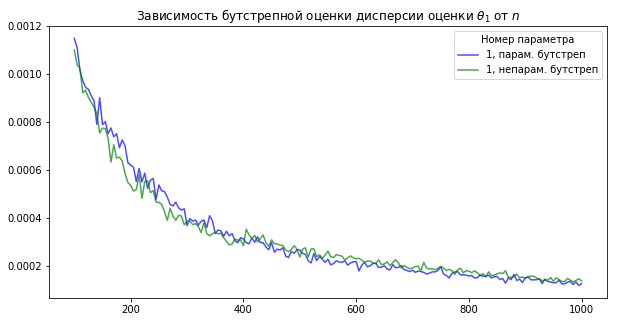

In [12]:
geom_distr = sts.geom
p_func = lambda x: 1 / np.mean(x) 
params = [0.2, 0.5, 0.8]

for param in params:
    distr = geom_distr(param)
    sample = distr.rvs(size=N)
    ests = calculate_estimator(sample, p_func)
    print('theta = ', param)
    make_bootstrap(geom_distr, sample, ests, 5, p_func)

### ж) $\mathrm{Beta}(\alpha, \beta)$

$\alpha^* = \frac{\left(\overline X\right)^2 - \overline{X^2}\overline X}{\overline{X^2} - \left(\overline X\right)^2}$, $\beta^* = \frac{(\overline X - \overline{X^2})(1 - \overline X)}{\overline{X^2} - \left(\overline X\right)^2}$

theta =  (1, 5)


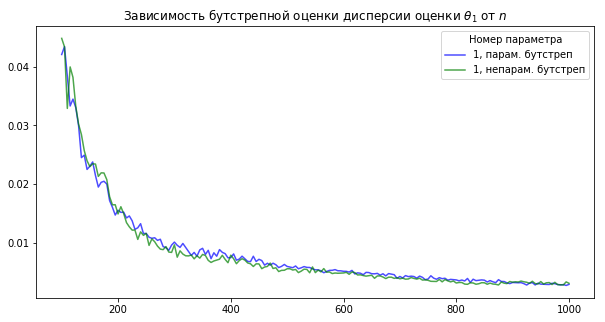

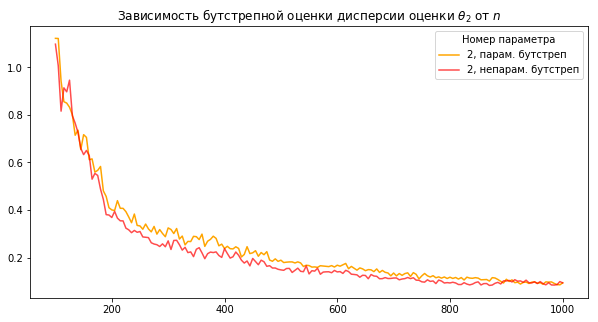

theta =  (0.5, 0.5)


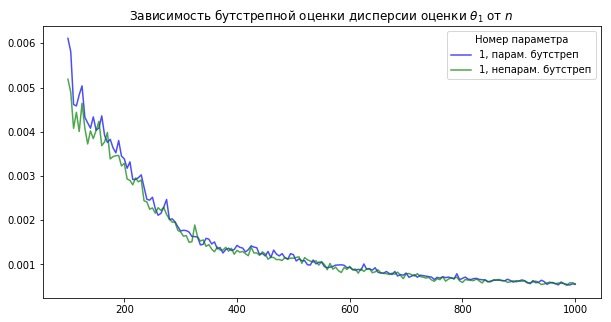

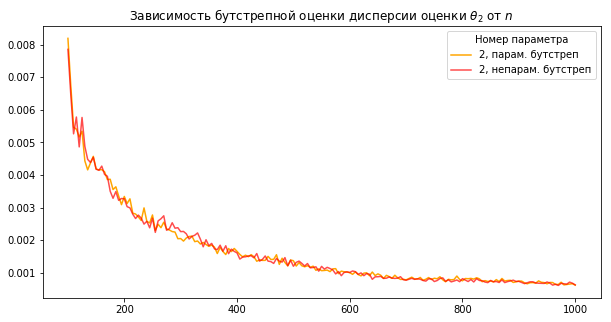

theta =  (5, 1)


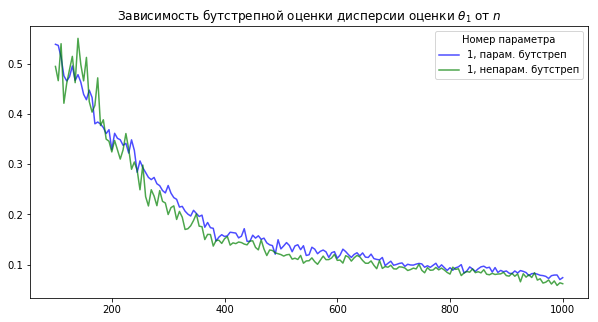

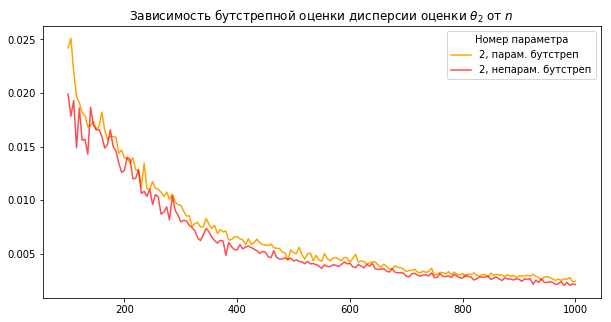

In [13]:
beta_distr = sts.beta
alpha_func = lambda x: (np.mean(x)**2 - np.mean(x**2)* 
                        np.mean(x)) / (np.mean(x**2) - (np.mean(x))**2)
beta_func = lambda x: (np.mean(x) - np.mean(x**2)) * (1 -
                       np.mean(x)) / (np.mean(x**2) - (np.mean(x))**2)
params = [(1,5), (0.5, 0.5), (5, 1)]

for param in params:
    distr = beta_distr(param[0], param[1])
    sample = distr.rvs(size=N)
    ests = calculate_estimator(sample, alpha_func, beta_func)
    print('theta = ', param)
    make_bootstrap(beta_distr, sample, ests, 5, alpha_func, 
                   beta_func)

### з) $\mathrm{Pareto}(\gamma)$

$\gamma^* = 1/\overline{\ln(X)}$

theta =  1


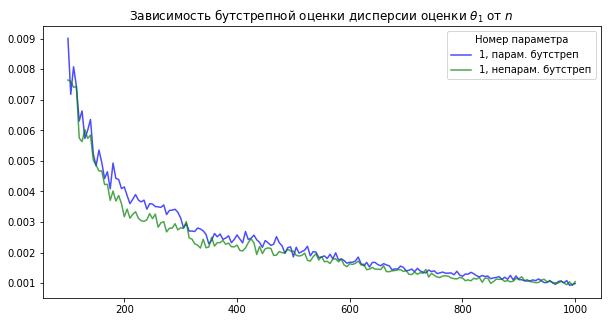


theta =  3


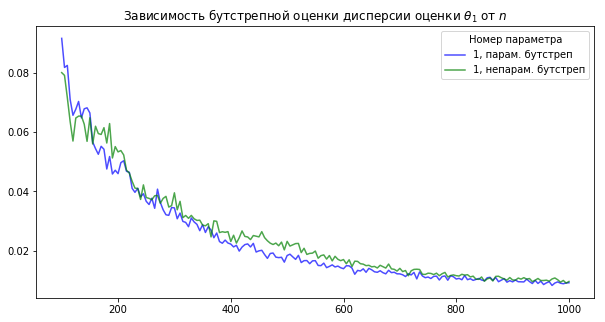


theta =  5


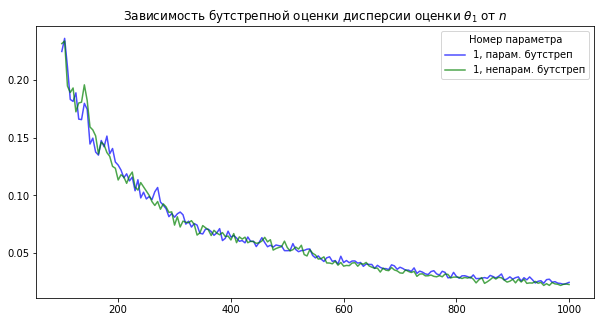

In [14]:
pareto_distr = sts.pareto
gamma_func = lambda x: 1 / np.mean(np.log(x))
params = [1, 3, 5]

for param in params:
    distr = pareto_distr(param)
    sample = distr.rvs(size=N)
    ests = calculate_estimator(sample, gamma_func)
    print('theta = ', param)
    make_bootstrap(pareto_distr, sample, ests, 5, gamma_func)

### и) $\mathrm{Cauchy}(\theta)$

$\theta^* = \frac1{\mathrm{tg}\left(\pi \overline{I(x \in [0, 1])}\right)}$

theta =  0.5


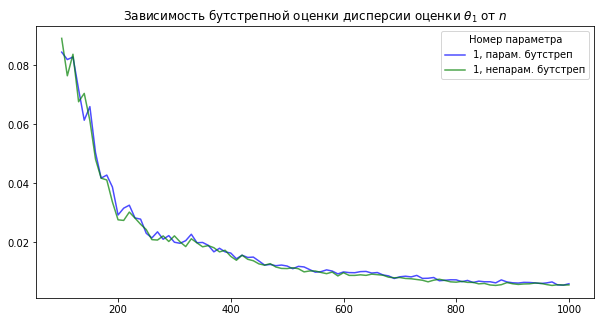


theta =  1


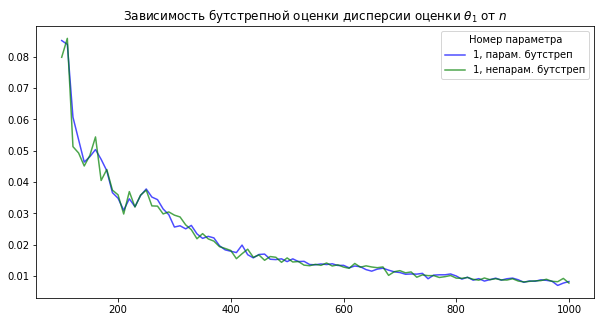


theta =  1.5


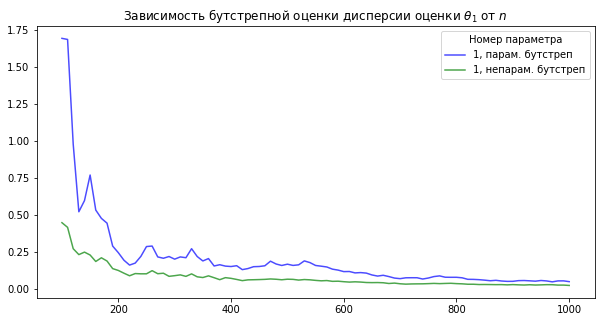

In [15]:
cauchy_distr = sts.cauchy
theta_func = lambda x: 1 / np.tan(np.pi * ((x <= 1) & (x >= 0)).sum() / len(x))
params = [0.5, 1, 1.5]

def parametric_distr(param):
    return cauchy_distr(scale=param)

for param in params:
    distr = cauchy_distr(param)
    sample = distr.rvs(size=N)
    ests = calculate_estimator(sample, theta_func)
    print('theta = ', param)
    make_bootstrap(cauchy_distr, sample, ests, 10, theta_func)

#### 3. Вывод.

Для всех рассмотренных распределений наблюдаются одни и те же закономерности. Бутстрепная оценка дисперсии оценки уменьшается с ростом $n$, и, как правило, зависит от величины значения самой оценки (например, увеличивается при увеличении параметра масштаба), при этом оставаясь в пределе много меньше его. Результаты, полученные параметрическим и непараметрическим методом, совпадают. Дальнейшие свойства бутстрепа станут ясны из 4 задания.